In [30]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats
import os
import subprocess

#import seaborn as sns
import sys
import scipy
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax 

from sympy import *
import random
import math

import matplotlib as mpl
mpl.rcParams['figure.figsize']   = (10,6)
mpl.rcParams['axes.prop_cycle']  = mpl.cycler(color=['#5E3C99','#018571','#4DAC26','#0571B0','#404040'])
mpl.rcParams['font.size']        = 14 # standard er 45
mpl.rcParams['lines.color']      = 'r'
mpl.rcParams['lines.markersize'] = 14
plt.rcParams['figure.constrained_layout.use'] = True

calib1 = np.arange(0,8,1)

Ef = np.array([3.2, 3.38, 3.58, 3.79, 4.04, 4.32, 4.64, 5])#

In [31]:
# Data functions for middel detectors

pathname_mid = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/res_scan_old_'

def extract_mid(pathname, version):

    fwhm_mid = []

    for i in calib1:
        path = str(pathname+str(i)+'_v4_'+version)
        to_folder_command = 'cd '+ path
        os.chdir(path)
    
        long_file = 'res_mon_mid_'+str(i)+'_list.ki_x.ki_y.ki_z.kf_x.kf_y.kf_z.x.y.z.p_i.p_f'
        mc_ras_run = 'mcresplot '+long_file
        os.system(mc_ras_run)
    
        data = np.loadtxt('resplot_res_matrix.txt')
    
        cov_matrix = np.loadtxt('resplot_cov_matrix.txt')
    
        B = data[:3,:3]
        J = data[:-1,3]
        C = data[3,3]

        e = np.dot(J.T,np.dot(np.linalg.inv(B),J))

        FWHM = (2*np.sqrt(2*np.log(2)))*np.power(data[3,3]-e,-0.5)
        sigma = FWHM/(2*np.sqrt(2*np.log(2)))
    
        fwhm_mid.append(FWHM)

    fwhm_mid = np.asarray(fwhm_mid)*1000
    
    return fwhm_mid


In [32]:


def extract_edge(pathname_edge, version):
    fwhm_old_edge = []

    for i in calib1:
        path = str(pathname_edge+str(i)+'_v4_'+version)
        to_folder_command = 'cd '+ path
        os.chdir(path)
    
        long_file = 'res_mon_edge_'+str(i)+'_list.ki_x.ki_y.ki_z.kf_x.kf_y.kf_z.x.y.z.p_i.p_f'
        mc_ras_run = 'mcresplot '+long_file
        os.system(mc_ras_run)
    
        data = np.loadtxt('resplot_res_matrix.txt')
    
        cov_matrix = np.loadtxt('resplot_cov_matrix.txt')
    
        B = data[:3,:3]
        J = data[:-1,3]
        C = data[3,3]

        e = np.dot(J.T,np.dot(np.linalg.inv(B),J))

        FWHM = (2*np.sqrt(2*np.log(2)))*np.power(data[3,3]-e,-0.5)
        sigma = FWHM/(2*np.sqrt(2*np.log(2)))
    
        fwhm_old_edge.append(FWHM)

    fwhm_edge = np.asarray(fwhm_old_edge)*1000
    
    return fwhm_edge


In [33]:
# Pathnames for new and old mono

pathname_old = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/res_scan_old_'

pathname_new = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/res_scan_new_'


In [34]:
# Data for the middel and edge detector vsr10

mid_vsr10 = extract_mid(pathname_new,'vsr10')
print(mid_vsr10)

edge_vsr10 = extract_edge(pathname_new,'vsr10')
print(edge_vsr10)


[116.14960107 131.7754788  147.579005   165.57814784 182.25332664
 193.33263496 224.9820052  245.35835844]
[116.58592782 134.93418266 146.8289612  158.4271899  176.85051868
 205.36859809 224.21958712 247.43750156]


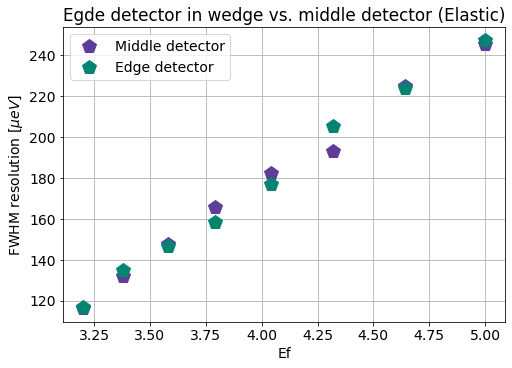

In [35]:
fig_mid_edge, ax_mid_edge = plt.subplots(figsize=(7,5))
#plt.plot(Ef, fwhm_old_mid, 'o', label='Old Mono middel detector')
#plt.plot(Ef, fwhm_old_edge, 'o', label='Old Mono edge detector')
plt.plot(Ef, mid_vsr10, 'p', label='Middle detector')
plt.plot(Ef, edge_vsr10, 'p', label='Edge detector')
plt.xlabel('Ef')
plt.ylabel('FWHM resolution [$\mu eV$]')
plt.title('Egde detector in wedge vs. middle detector (Elastic)')
plt.legend()
plt.grid()
plt.savefig('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/edge_vs_mid.pdf')

[118.28339572 124.46632592 135.82166148 156.41075994 178.20676489
 194.29577719 223.8990815  247.15012237]


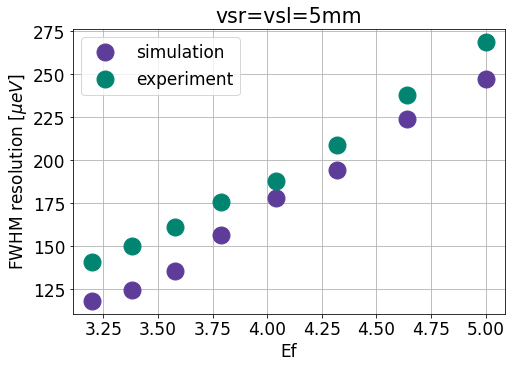

In [8]:
vsr5_sim = extract_mid(pathname_new,'vsr5')
print(vsr5_sim)

vsr5_data = np.array([141, 150, 161, 176, 188, 209, 238, 269])

fig_vsr5, ax_vsr5 = plt.subplots(figsize=(7,5))
ax_vsr5.plot(Ef, vsr5_sim, 'o', label='simulation')
ax_vsr5.plot(Ef, vsr5_data, 'o', label='experiment')
ax_vsr5.set_xlabel('Ef')
ax_vsr5.set_ylabel('FWHM resolution [$\mu eV$]')
ax_vsr5.set_title('vsr=vsl=5mm')
ax_vsr5.legend()
ax_vsr5.grid()
fig_vsr5.savefig('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/resolution_vsr5.pdf')

[116.14960107 131.7754788  147.579005   165.57814784 182.25332664
 193.33263496 224.9820052  245.35835844]


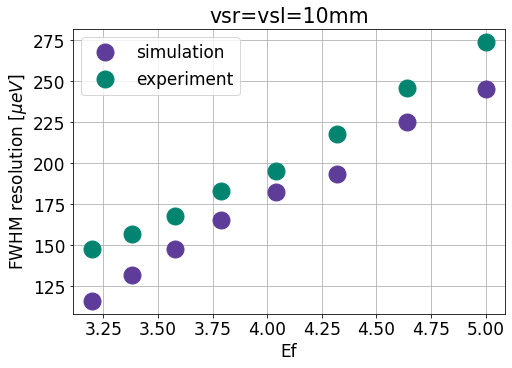

In [9]:
vsr10_sim = extract_mid(pathname_new,'vsr10')
print(vsr10_sim)

vsr10_data = np.array([148, 157, 168, 183, 195, 218, 246, 274])


fig_vsr10, ax_vsr10 = plt.subplots(figsize=(7,5))
ax_vsr10.plot(Ef, vsr10_sim, 'o', label='simulation')
ax_vsr10.plot(Ef, vsr10_data, 'o', label='experiment')
ax_vsr10.set_xlabel('Ef')
ax_vsr10.set_ylabel('FWHM resolution [$\mu eV$]')
ax_vsr10.set_title('vsr=vsl=10mm')
ax_vsr10.legend()
ax_vsr10.grid()
fig_vsr10.savefig('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/resolution_vsr10.pdf')

[117.1466957  129.62757304 149.78044995 156.23122957 180.85243938
 201.9535145  227.77616232 254.4314876 ]


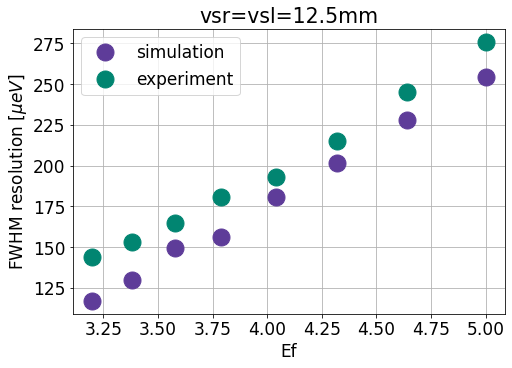

In [10]:
vsr25_sim = extract_mid(pathname_new,'vsr25')
print(vsr25_sim)

vsr25_data = np.array([144, 153, 165, 181, 193, 215, 245, 276])

fig_vsr12p5, ax_vsr12p5 = plt.subplots(figsize=(7,5))
ax_vsr12p5.plot(Ef, vsr25_sim, 'o', label='simulation')
ax_vsr12p5.plot(Ef, vsr25_data, 'o', label='experiment')
ax_vsr12p5.set_xlabel('Ef')
ax_vsr12p5.set_ylabel('FWHM resolution [$\mu eV$]')
ax_vsr12p5.set_title('vsr=vsl=12.5mm')
ax_vsr12p5.legend()
ax_vsr12p5.grid()
fig_vsr12p5.savefig('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/resolution_vsr12p5.pdf')

[116.55684733 131.87132483 151.97846715 162.95306693 182.78227039
 205.26510688 233.09857836 255.05684823]


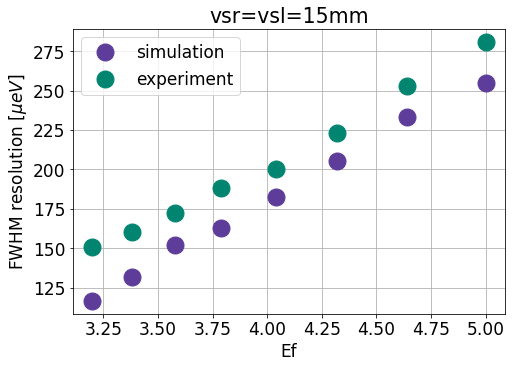

In [11]:
vsr30_sim = extract_mid(pathname_new,'vsr30')
print(vsr30_sim)

vsr30_data = np.array([151, 160, 172, 188, 200, 223, 253, 281])

fig_vsr15, ax_vsr15 = plt.subplots(figsize=(7,5))
ax_vsr15.plot(Ef, vsr30_sim, 'o', label='simulation')
ax_vsr15.plot(Ef, vsr30_data, 'o', label='experiment')
ax_vsr15.set_xlabel('Ef')
ax_vsr15.set_ylabel('FWHM resolution [$\mu eV$]')
ax_vsr15.set_title('vsr=vsl=15mm')
ax_vsr15.legend()
ax_vsr15.grid()
fig_vsr15.savefig('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/resolution_vsr15.pdf')

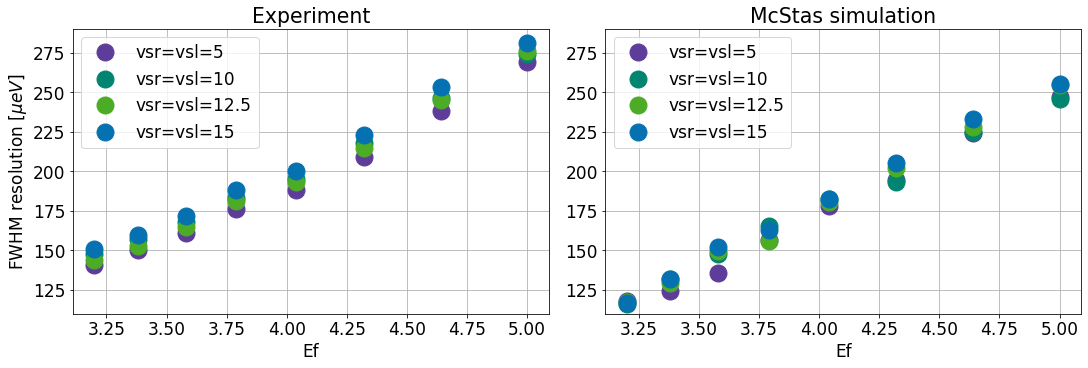

In [12]:
fig_sim, ax_sim = plt.subplots(1, 2, figsize=(15,5))
ax_sim[1].plot(Ef, vsr5_sim, 'o', label='vsr=vsl=5')
ax_sim[1].plot(Ef, vsr10_sim, 'o', label='vsr=vsl=10')
ax_sim[1].plot(Ef, vsr25_sim, 'o', label='vsr=vsl=12.5')
ax_sim[1].plot(Ef, vsr30_sim, 'o', label='vsr=vsl=15')
ax_sim[1].set_xlabel('Ef')
ax_sim[1].set_title('McStas simulation')
ax_sim[0].plot(Ef, vsr5_data, 'o', label='vsr=vsl=5')
ax_sim[0].plot(Ef, vsr10_data, 'o', label='vsr=vsl=10')
ax_sim[0].plot(Ef, vsr25_data, 'o', label='vsr=vsl=12.5')
ax_sim[0].plot(Ef, vsr30_data, 'o', label='vsr=vsl=15')
ax_sim[0].set_xlabel('Ef')
ax_sim[0].set_ylabel('FWHM resolution [$\mu eV$]')
ax_sim[0].set_title('Experiment')
ax_sim[0].legend()
ax_sim[1].legend()
ax_sim[0].grid()
ax_sim[1].grid()
ax_sim[0].set_ylim([110, 290])
ax_sim[1].set_ylim([110, 290])
fig_sim.savefig('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Virtual_slits.pdf')

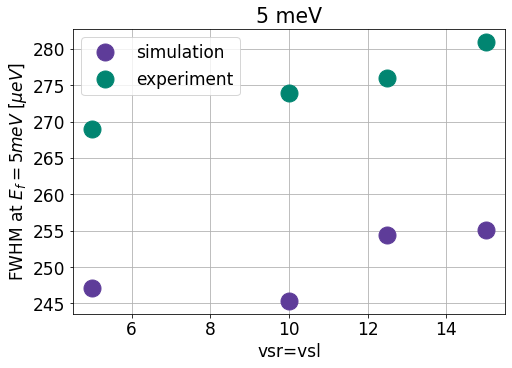

In [13]:
sim_data = np.array([vsr5_sim[-1], vsr10_sim[-1], vsr25_sim[-1], vsr30_sim[-1]])

real_data = np.array([vsr5_data[-1], vsr10_data[-1], vsr25_data[-1], vsr30_data[-1]])

vsr_scale = np.array([5, 10, 12.5, 15])

fig_fwhm, ax_fwhm = plt.subplots(figsize=(7,5))
ax_fwhm.plot(vsr_scale, sim_data, 'o', label='simulation')
ax_fwhm.plot(vsr_scale, real_data, 'o', label='experiment')
ax_fwhm.set_xlabel('vsr=vsl')
ax_fwhm.set_ylabel('FWHM at $E_f = 5meV$ [$\mu eV$]')
ax_fwhm.set_title('5 meV')
ax_fwhm.legend()
ax_fwhm.grid()
fig_fwhm.savefig('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/resolution_5mev.pdf')


In [14]:
# Slitsize and samplewidth

calib1 = np.arange(0,8,1)

pathname_slit05 = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/res_scan_new_'

fwhm_slit05 = []

for i in calib1:
    path = str(pathname_slit05+str(i)+'_v4_slit05_1')
    to_folder_command = 'cd '+ path
    os.chdir(path)
    
    long_file = 'res_mon_mid_'+str(i)+'_list.ki_x.ki_y.ki_z.kf_x.kf_y.kf_z.x.y.z.p_i.p_f'
    mc_ras_run = 'mcresplot '+long_file
    os.system(mc_ras_run)
    
    data = np.loadtxt('resplot_res_matrix.txt')
    
    cov_matrix = np.loadtxt('resplot_cov_matrix.txt')
    
    B = data[:3,:3]
    J = data[:-1,3]
    C = data[3,3]

    e = np.dot(J.T,np.dot(np.linalg.inv(B),J))

    FWHM = (2*np.sqrt(2*np.log(2)))*np.power(data[3,3]-e,-0.5)
    sigma = FWHM/(2*np.sqrt(2*np.log(2)))
    
    fwhm_slit05.append(FWHM)

fwhm_slit05 = np.asarray(fwhm_slit05)*1000

print('fwhm_slit05 =',fwhm_slit05)


fwhm_slit05 = [125.12287905 125.97586632 108.23932675 152.15945348 160.44535818
 197.93298889 223.20723228 245.36259052]


In [15]:
calib1 = np.arange(0,8,1)

pathname_slit1 = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/res_scan_new_'

fwhm_slit1 = []

for i in calib1:
    path = str(pathname_slit1+str(i)+'_v4_slit1_1')
    to_folder_command = 'cd '+ path
    os.chdir(path)
    
    long_file = 'res_mon_mid_'+str(i)+'_list.ki_x.ki_y.ki_z.kf_x.kf_y.kf_z.x.y.z.p_i.p_f'
    mc_ras_run = 'mcresplot '+long_file
    os.system(mc_ras_run)
    
    data = np.loadtxt('resplot_res_matrix.txt')
    
    cov_matrix = np.loadtxt('resplot_cov_matrix.txt')
    
    B = data[:3,:3]
    J = data[:-1,3]
    C = data[3,3]

    e = np.dot(J.T,np.dot(np.linalg.inv(B),J))

    FWHM = (2*np.sqrt(2*np.log(2)))*np.power(data[3,3]-e,-0.5)
    sigma = FWHM/(2*np.sqrt(2*np.log(2)))
    
    fwhm_slit1.append(FWHM)

fwhm_slit1 = np.asarray(fwhm_slit1)*1000

print('fwhm_slit1 =',fwhm_slit1)

fwhm_slit1 = [112.36481485 121.99090892 147.35461455 157.74279516 166.55761033
 188.97434612 230.0008891  242.84679541]


In [16]:
calib1 = np.arange(0,8,1)

pathname_slit2 = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/res_scan_new_'

fwhm_slit2 = []

for i in calib1:
    path = str(pathname_slit2+str(i)+'_v4_slit2_1')
    to_folder_command = 'cd '+ path
    os.chdir(path)
    
    long_file = 'res_mon_mid_'+str(i)+'_list.ki_x.ki_y.ki_z.kf_x.kf_y.kf_z.x.y.z.p_i.p_f'
    mc_ras_run = 'mcresplot '+long_file
    os.system(mc_ras_run)
    
    data = np.loadtxt('resplot_res_matrix.txt')
    
    cov_matrix = np.loadtxt('resplot_cov_matrix.txt')
    
    B = data[:3,:3]
    J = data[:-1,3]
    C = data[3,3]

    e = np.dot(J.T,np.dot(np.linalg.inv(B),J))

    FWHM = (2*np.sqrt(2*np.log(2)))*np.power(data[3,3]-e,-0.5)
    sigma = FWHM/(2*np.sqrt(2*np.log(2)))
    
    fwhm_slit2.append(FWHM)

fwhm_slit2 = np.asarray(fwhm_slit2)*1000

print('fwhm_slit2 =',fwhm_slit2)

fwhm_slit2 = [110.64203581 130.22283463 136.69725572 149.88228504 177.07548465
 193.71906591 218.99615902 239.6343683 ]


In [17]:
calib1 = np.arange(0,8,1)

pathname_slit3 = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/res_scan_new_'

fwhm_slit3 = []

for i in calib1:
    path = str(pathname_slit3+str(i)+'_v4_slit3_1')
    to_folder_command = 'cd '+ path
    os.chdir(path)
    
    long_file = 'res_mon_mid_'+str(i)+'_list.ki_x.ki_y.ki_z.kf_x.kf_y.kf_z.x.y.z.p_i.p_f'
    mc_ras_run = 'mcresplot '+long_file
    os.system(mc_ras_run)
    
    data = np.loadtxt('resplot_res_matrix.txt')
    
    cov_matrix = np.loadtxt('resplot_cov_matrix.txt')
    
    B = data[:3,:3]
    J = data[:-1,3]
    C = data[3,3]
    

    e = np.dot(J.T,np.dot(np.linalg.inv(B),J))

    FWHM = (2*np.sqrt(2*np.log(2)))*np.power(data[3,3]-e,-0.5)
    sigma = FWHM/(2*np.sqrt(2*np.log(2)))
    
    fwhm_slit3.append(FWHM)

fwhm_slit3 = np.asarray(fwhm_slit3)*1000

print('fwhm_slit3 =',fwhm_slit3)

fwhm_slit3 = [119.40527155 127.77665393 141.86380607 155.88529748 178.87971242
 195.12882992 224.97490444 248.24369582]


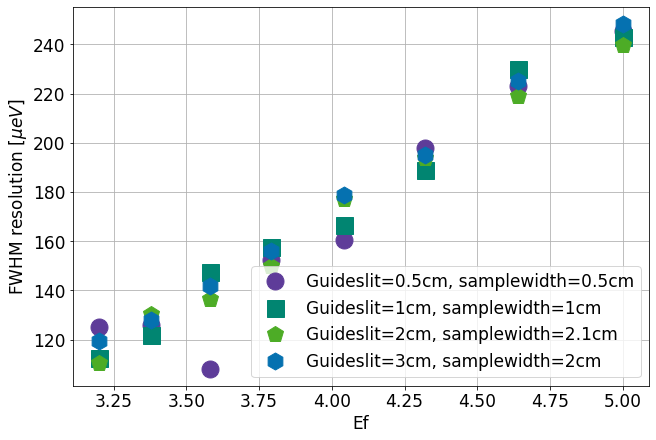

In [18]:
fig_new_old, ax_new_old = plt.subplots(figsize=(9,6))
plt.plot(Ef, fwhm_slit05, 'o', label='Guideslit=0.5cm, samplewidth=0.5cm')
plt.plot(Ef, fwhm_slit1, 's', label='Guideslit=1cm, samplewidth=1cm')
plt.plot(Ef, fwhm_slit2, 'p', label='Guideslit=2cm, samplewidth=2.1cm')
plt.plot(Ef, fwhm_slit3, 'h', label='Guideslit=3cm, samplewidth=2cm')
plt.xlabel('Ef')
plt.ylabel('FWHM resolution [$\mu eV$]')
plt.title('')
plt.legend()
plt.grid()
plt.savefig('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/elastic_scattering_resolution_virtual.pdf')

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 3.051e+05                  │       Ncalls = 177 (177 total)       │
│ EDM = 2.02e-05 (Goal: 0.0002)    │               up = 1.0               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 5.691e+06                  │       Ncalls = 189 (189 total)       │
│ EDM = 8.12e+09 (Goal: 0.0002)    │               up = 1.0               │
├───────────

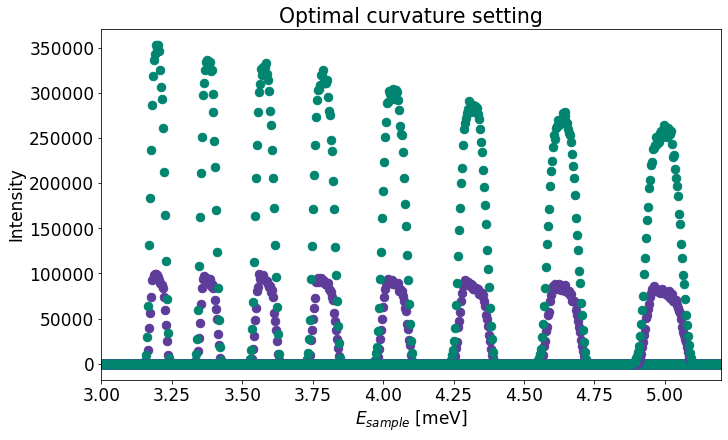

In [127]:
## Energy width at sample position


def gauss(x,a,mu,sigma):
    return  a*np.exp(-(x-mu)** 2 / (2*sigma**2))

    
pathname_energy_old = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/energy_scan_old_'
pathname_energy_new = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/energy_scan_new_'    
    
    
calib1 = np.arange(0,8,1)
    
guess_sigma = np.array([0.015, 0.015, 0.02, 0.023, 0.025, 0.027, 0.03, 0.035])
    
fwhm_old_mono_sample = []
fwhm_old_mono_sample_error = []
    
for i in calib1:
    path = str(pathname_energy_old+str(i)+'_1')
    to_folder_command = 'cd '+ path
    os.chdir(path)

    E_old_sample = []
    I_old_sample = []
    I_err_old_sample = []
    N_old_sample = []


    data = np.loadtxt('Energy_sample_pos.dat')
    for n in data:
        E_old_sample.append(n[0])
        I_old_sample.append(n[1])
        I_err_old_sample.append(n[2])
        N_old_sample.append(n[3])

    intensity= np.array(I_old_sample)
    E = np.array(E_old_sample)
    error = np.array(I_err_old_sample)


    chi2fit = Chi2Regression(gauss, E[intensity>1], intensity[intensity>1], error[intensity>1]) # Chi**2 fit to the histograms excluding the empty bins.
    minuit = Minuit(chi2fit, pedantic=False, a=4000, mu=Ef[i], sigma=guess_sigma[i] ,print_level=1) 
    minuit.migrad();
    fit_parameters = minuit.args
    fit_errors = minuit.errors

    fwhm_old_mono_sample.append(2*np.sqrt(2*np.log(2))*fit_parameters[2])
    fwhm_old_mono_sample_error.append(2*np.sqrt(2*np.log(2))*fit_errors[2])
        
    x_range_old = np.linspace(min(E_old_sample), max(E_old_sample), 1000)
    plt.plot(E, intensity, '.', color='#5E3C99', label='Old mono')
    plt.xlim(3, 5.2)
    #plt.plot(E, gauss(x_range_old, *fit_parameters),'g')
    plt.xlabel('Energy [meV]')
    plt.ylabel('Intensity')
    #plt.legend()
    
    path = str(pathname_energy_new+str(i)+'_1')
    to_folder_command = 'cd '+ path
    os.chdir(path)
    
    E_new_sample = []
    I_new_sample = []
    I_err_new_sample = []
    N_new_sample = []
    
    
    data = np.loadtxt('Energy_sample_pos.dat')
    for n in data:
        E_new_sample.append(n[0])
        I_new_sample.append(n[1])
        I_err_new_sample.append(n[2])
        N_new_sample.append(n[3])
    
    intensity_new= np.array(I_new_sample)
    E_new = np.array(E_new_sample)
    error_new = np.array(I_err_new_sample)
    
    
    chi2fit_new = Chi2Regression(gauss, E_new[intensity_new>1], intensity_new[intensity_new>1], error_new[intensity_new>1]) # Chi**2 fit to the histograms excluding the empty bins.
    minuit_new = Minuit(chi2fit_new, pedantic=False, a=7500, mu=Ef[i], sigma=guess_sigma[i] ,print_level=1) 
    minuit_new.migrad();
    fit_parameters_new = minuit_new.args
    fit_errors_new = minuit_new.errors

    #fwhm_new_mono_sample.append(2*np.sqrt(2*np.log(2))*fit_parameters_new[2])
    #fwhm_new_mono_sample_error.append(2*np.sqrt(2*np.log(2))*fit_errors_new[2])
    
    x_range_new = np.linspace(min(E_new_sample), max(E_new_sample), 1000)
    plt.plot(E_new_sample, intensity_new, '.', color='#018571')
    plt.xlim(3, 5.2)
    #plt.plot(E_new, gauss(x_range_new, *fit_parameters_new),'g')
    plt.xlabel('$E_{sample}$ [meV]')
    plt.ylabel('Intensity')
    plt.title('Optimal curvature setting')
    plt.savefig('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/new_monochromator_1.pdf')
        
fwhm_old_mono_sample = np.asarray(fwhm_old_mono_sample)
fwh_old_mono_sample_error = np.asarray(fwhm_old_mono_sample_error)
E_old_sample = np.asarray(E_old_sample)
I_old_sample = np.asarray(I_old_sample)





#fwhm_old_mono_sample = fit_gauss(pathname_energy_old)[0]
#fwhm_old_mono_sample_error = fit_gauss(pathname_energy_old)[1]

#fwhm_new_mono_sample = fit_gauss(pathname_energy_new)[0]
#fwhm_new_mono_sample_error = fit_gauss(pathname_energy_new)[1]

#I_old = fit_gauss(pathname_energy_new)[3]
#E_old = fit_gauss(pathname_energy_new)[2]



┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 7.299e+04                  │        Ncalls = 93 (93 total)        │
│ EDM = 5.48e-06 (Goal: 0.0002)    │               up = 1.0               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1.26e+05                   │        Ncalls = 87 (87 total)        │
│ EDM = 6.31e-06 (Goal: 0.0002)    │               up = 1.0               │
├───────────

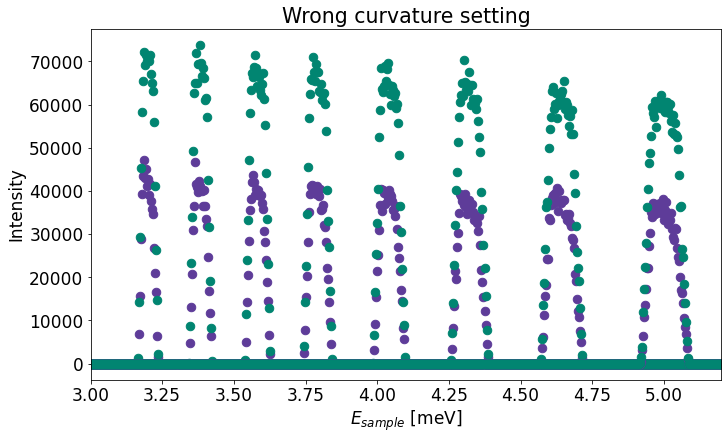

In [126]:
calib1 = np.arange(0,8,1)
    
guess_sigma = np.array([0.015, 0.015, 0.02, 0.023, 0.025, 0.027, 0.03, 0.035])
    
fwhm_old_mono_sample = []
fwhm_old_mono_sample_error = []
    
for i in calib1:
    path = str(pathname_energy_old+str(i))
    to_folder_command = 'cd '+ path
    os.chdir(path)

    E_old_sample = []
    I_old_sample = []
    I_err_old_sample = []
    N_old_sample = []


    data = np.loadtxt('Energy_sample_pos.dat')
    for n in data:
        E_old_sample.append(n[0])
        I_old_sample.append(n[1])
        I_err_old_sample.append(n[2])
        N_old_sample.append(n[3])

    intensity= np.array(I_old_sample)
    E = np.array(E_old_sample)
    error = np.array(I_err_old_sample)


    chi2fit = Chi2Regression(gauss, E[intensity>1], intensity[intensity>1], error[intensity>1]) # Chi**2 fit to the histograms excluding the empty bins.
    minuit = Minuit(chi2fit, pedantic=False, a=4000, mu=Ef[i], sigma=guess_sigma[i] ,print_level=1) 
    minuit.migrad();
    fit_parameters = minuit.args
    fit_errors = minuit.errors

    fwhm_old_mono_sample.append(2*np.sqrt(2*np.log(2))*fit_parameters[2])
    fwhm_old_mono_sample_error.append(2*np.sqrt(2*np.log(2))*fit_errors[2])
        
    x_range_old = np.linspace(min(E_new), max(E_new), 1000)
    plt.plot(E, intensity, '.', color='#5E3C99')
    plt.xlim(3, 5.2)
    #plt.plot(E, gauss(x_range_old, *fit_parameters),'g')
    plt.xlabel('Energy [meV]')
    plt.ylabel('Intensity')
    
    path = str(pathname_energy_new+str(i))
    to_folder_command = 'cd '+ path
    os.chdir(path)
    
    E_new_sample = []
    I_new_sample = []
    I_err_new_sample = []
    N_new_sample = []
    
    
    data = np.loadtxt('Energy_sample_pos.dat')
    for n in data:
        E_new_sample.append(n[0])
        I_new_sample.append(n[1])
        I_err_new_sample.append(n[2])
        N_new_sample.append(n[3])
    
    intensity_new= np.array(I_new_sample)
    E_new = np.array(E_new_sample)
    error_new = np.array(I_err_new_sample)
    
    
    chi2fit_new = Chi2Regression(gauss, E_new[intensity_new>1], intensity_new[intensity_new>1], error_new[intensity_new>1]) # Chi**2 fit to the histograms excluding the empty bins.
    minuit_new = Minuit(chi2fit_new, pedantic=False, a=7500, mu=Ef[i], sigma=guess_sigma[i] ,print_level=1) 
    minuit_new.migrad();
    fit_parameters_new = minuit_new.args
    fit_errors_new = minuit_new.errors

    #fwhm_new_mono_sample.append(2*np.sqrt(2*np.log(2))*fit_parameters_new[2])
    #fwhm_new_mono_sample_error.append(2*np.sqrt(2*np.log(2))*fit_errors_new[2])
    
    x_range_new = np.linspace(min(E_new), max(E_new), 1000)
    plt.plot(E_new, intensity_new, '.', color='#018571')
    plt.xlim(3, 5.2)
    #plt.plot(E_new, gauss(x_range_new, *fit_parameters_new),'g')
    plt.xlabel('$E_{sample}$ [meV]')
    plt.ylabel('Intensity')
    plt.grid()
    plt.title('Wrong curvature setting')
    plt.savefig('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/wrong_curvature_mono.pdf')
        
fwhm_old_mono_sample = np.asarray(fwhm_old_mono_sample)
fwh_old_mono_sample_error = np.asarray(fwhm_old_mono_sample_error)
E_old_sample = np.asarray(E_old_sample)
I_old_sample = np.asarray(I_old_sample)



pathname_energy_old = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/energy_scan_old_'
pathname_energy_new = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/energy_scan_new_'

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1.764e+06                  │       Ncalls = 193 (193 total)       │
│ EDM = 5.56e-09 (Goal: 0.0002)    │               up = 1.0               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 7.534e+05                  │       Ncalls = 196 (196 total)       │
│ EDM = 9.81e-07 (Goal: 0.0002)    │               up = 1.0               │
├───────────

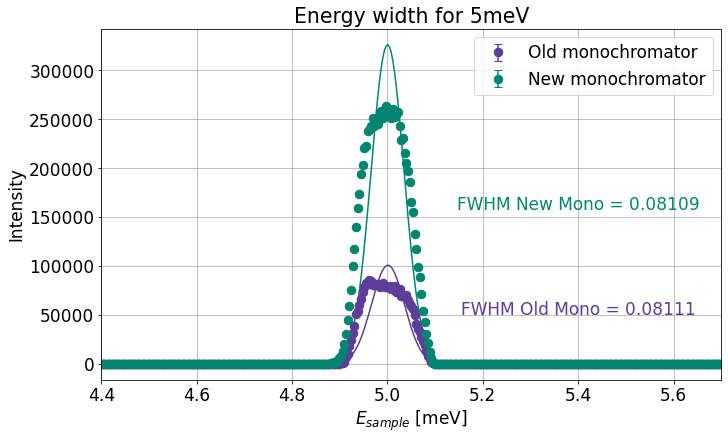

In [125]:

path = str('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/energy_scan_old_7_1')
path1 = str('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/energy_scan_new_7_1')
to_folder_command = 'cd '+ path
os.chdir(path)

E_old_sample = []
I_old_sample = []
I_err_old_sample = []
N_old_sample = []


data = np.loadtxt('Energy_sample_pos.dat')
for n in data:
    E_old_sample.append(n[0])
    I_old_sample.append(n[1])
    I_err_old_sample.append(n[2])
    N_old_sample.append(n[3])

intensity_old= np.array(I_old_sample)
E_old = np.array(E_old_sample)
error_old = np.array(I_err_old_sample)


os.chdir(path1)

E_new_sample = []
I_new_sample = []
I_err_new_sample = []
N_new_sample = []


data1 = np.loadtxt('Energy_sample_pos.dat')
for n in data1:
    E_new_sample.append(n[0])
    I_new_sample.append(n[1])
    I_err_new_sample.append(n[2])
    N_new_sample.append(n[3])

intensity_new= np.array(I_new_sample)
E_new = np.array(E_new_sample)
error_new = np.array(I_err_new_sample)


chi2fit_new = Chi2Regression(gauss, E_new[intensity_new>1], intensity_new[intensity_new>1], error_new[intensity_new>1]) # Chi**2 fit to the histograms excluding the empty bins.
minuit_new = Minuit(chi2fit_new, pedantic=False, a=250000, mu=5, sigma=0.08 ,print_level=1) 
minuit_new.migrad();
fit_parameters_new = minuit_new.args
fit_errors_new = minuit_new.errors

fwhm_new_mono_sample = (2*np.sqrt(2*np.log(2))*fit_parameters_new[2])
fwhm_new_mono_sample_error = (2*np.sqrt(2*np.log(2))*fit_errors_new[2])


x_range_new = np.linspace(min(E_new), max(E_new), 1000)


chi2fit_old = Chi2Regression(gauss, E_old[intensity_old>1], intensity_old[intensity_old>1], error_old[intensity_old>1]) # Chi**2 fit to the histograms excluding the empty bins.
minuit_old = Minuit(chi2fit_old, pedantic=False, a=1000, mu=5, sigma=0.08, print_level=1) 
minuit_old.migrad();
fit_parameters_old = minuit_old.args
fit_errors_old = minuit_old.errors

fwhm_old_mono_sample = (2*np.sqrt(2*np.log(2))*fit_parameters_old[2])
fwhm_old_mono_sample_error = (2*np.sqrt(2*np.log(2))*fit_errors_old[2])


x_range_old = np.linspace(min(E_new), max(E_new), 1000)

print(fwhm_old_mono_sample)
print(fwhm_new_mono_sample)


fig_width, ax_width = plt.subplots()
ax_width.errorbar(E_old, intensity_old, error_old,fmt='.',capsize=4,label='Old monochromator')
ax_width.errorbar(E_new, intensity_new, error_new,fmt='.', capsize=4,label='New monochromator')
ax_width.plot(E_new, gauss(x_range_new, *fit_parameters_new), '#018571')
ax_width.plot(E_old, gauss(x_range_old, *fit_parameters_old),'#5E3C99')
ax_width.text(0.77, 0.5, 'FWHM New Mono = 0.08109', horizontalalignment='center', verticalalignment='center', color='#018571',transform=ax_width.transAxes)
ax_width.text(0.77, 0.2, 'FWHM Old Mono = 0.08111', horizontalalignment='center', verticalalignment='center', color='#5E3C99',transform=ax_width.transAxes)
ax_width.legend()
ax_width.set_xlabel('$E_{sample}$ [meV]')
ax_width.set_ylabel('Intensity')
ax_width.grid()
ax_width.set_xlim(4.4,5.7)
ax_width.set_title('Energy width for 5meV')
fig_width.savefig('/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/old_new_comparison.pdf')

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1.26e+05                   │        Ncalls = 87 (87 total)        │
│ EDM = 6.31e-06 (Goal: 0.0002)    │               up = 1.0               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 2.369e+05                  │       Ncalls = 139 (139 total)       │
│ EDM = 3.02e-07 (Goal: 0.0002)    │               up = 1.0               │
├───────────

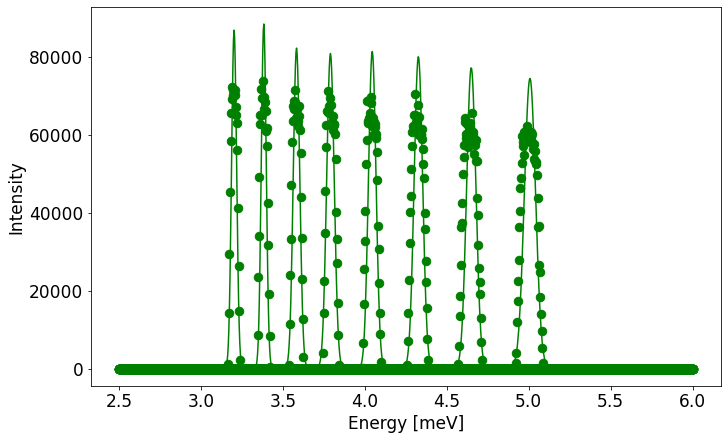

In [106]:

pathname_energy_new = '/home/kristine/Dropbox/Masters_2/CAMEA_Resolution_project/Resolution_intrument/energy_scan_new_'

fwhm_new_mono_sample = []
fwhm_new_mono_sample_error = []

guess_sigma = np.array([0.015, 0.015, 0.02, 0.023, 0.025, 0.027, 0.03, 0.035])
    
for i in calib1:
    path = str(pathname_energy_new+str(i))
    to_folder_command = 'cd '+ path
    os.chdir(path)
    
    E_new_sample = []
    I_new_sample = []
    I_err_new_sample = []
    N_new_sample = []
    
    
    data = np.loadtxt('Energy_sample_pos.dat')
    for n in data:
        E_new_sample.append(n[0])
        I_new_sample.append(n[1])
        I_err_new_sample.append(n[2])
        N_new_sample.append(n[3])
    
    intensity_new= np.array(I_new_sample)
    E_new = np.array(E_new_sample)
    error_new = np.array(I_err_new_sample)
    
    
    chi2fit_new = Chi2Regression(gauss, E_new[intensity_new>1], intensity_new[intensity_new>1], error_new[intensity_new>1]) # Chi**2 fit to the histograms excluding the empty bins.
    minuit_new = Minuit(chi2fit_new, pedantic=False, a=7500, mu=Ef[i], sigma=guess_sigma[i] ,print_level=1) 
    minuit_new.migrad();
    fit_parameters_new = minuit_new.args
    fit_errors_new = minuit_new.errors

    fwhm_new_mono_sample.append(2*np.sqrt(2*np.log(2))*fit_parameters_new[2])
    fwhm_new_mono_sample_error.append(2*np.sqrt(2*np.log(2))*fit_errors_new[2])
    
    x_range_new = np.linspace(min(E_new), max(E_new), 1000)
    plt.plot(E_new, intensity_new, '.g')
    plt.plot(E_new, gauss(x_range_new, *fit_parameters_new),'g')
    plt.xlabel('Energy [meV]')
    plt.ylabel('Intensity')
    

    
fwhm_old_mono_sample = np.asarray(fwhm_old_mono_sample)
fwhm_new_mono_sample = np.asarray(fwhm_new_mono_sample)

fwhm_old_mono_sample_error = np.asarray(fwhm_old_mono_sample_error)
fwhm_new_mono_sample_error = np.asarray(fwhm_new_mono_sample_error)
